# Installation

In [1]:
pip install pgeocode

In [2]:
pip install polyline

# Import libraries

In [3]:
#HTTP requests for python
import requests
import json
import polyline
import datetime
#Webscraping with BeautifulSoup
from bs4 import BeautifulSoup
#Data manipulation
import pandas as pd
#Postal code geocoding and distance calculations
import pgeocode
#Maps
import folium


# Data Cleaning

In [4]:
url ='https://en.wikipedia.org/wiki/Postal_codes_in_Costa_Rica'

df = pd.read_html(url)[0]

In [5]:
df.head()

,Province,Canton,District,PostalCode
0,San José,San José,Carmen,10101
1,San José,San José,Merced,10102
2,San José,San José,Hospital,10103
3,San José,San José,Catedral,10104
4,San José,San José,Zapote,10105


In [6]:
df['Province'].unique()

array(['San José', 'Alajuela', 'Cartago', 'Heredia', 'Guanacaste',
       'Puntarenas', 'Limón'], dtype=object)

In [7]:
 'Puerto Viejo' in df['District'].unique()

True

In [8]:
country = pgeocode.Nominatim('cr')

In [9]:
def lat(x):

  return country.query_postal_code(x)['latitude']

def long(x):

  return country.query_postal_code(x)['longitude']  

In [10]:
df['latitude'] = df['PostalCode'].map(lambda x: lat(x) )
df['longitude'] = df['PostalCode'].map(lambda x: long(x) )

In [11]:
df = df.dropna(subset=['longitude'])
df = df.dropna(subset=['latitude'])

In [12]:
df.head()

,Province,Canton,District,PostalCode,latitude,longitude
0,San José,San José,Carmen,10101,9.9364,-84.0693
1,San José,San José,Merced,10102,9.9397,-84.0884
2,San José,San José,Hospital,10103,9.9277,-84.0887
3,San José,San José,Catedral,10104,9.9262,-84.0731
4,San José,San José,Zapote,10105,9.9205,-84.0598


# Map of Districts in Costa Rica

In [13]:
# monteverde coordinates

latitude , longitude = 10.31792333245692,-84.79402582701236

map_cr = folium.Map(location=[latitude, longitude], zoom_start=10)
    
folium.CircleMarker(
        location = [latitude, longitude],
        radius=10,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_cr)

for index,row in df.iterrows():

      lat = row['latitude']
      lng = row['longitude']
      label = row['District']
      folium.CircleMarker(
        location = [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_cr)       


map_cr

# Travel time example




In [14]:

# # long , lat format

# p1= "-84.0693,9.9364"
# p2= "-84.79402582701236,10.31792333245692"


# url = "http://router.project-osrm.org/route/v1/car/"+p1+";"+p2+"?overview=false"
# r = requests.get(url)

# routes = json.loads(r.content)
# route_i = routes.get("routes")[0]

Return the duration of the travel in seconds

In [15]:
#route_i["duration"]

In [16]:
#Results checked
#str(datetime.timedelta(seconds=route_i["duration"]))

In [17]:
def durations(p1,p2):
  url = "http://router.project-osrm.org/route/v1/car/"+p1+";"+p2+"?overview=false"
    
  r = requests.get(url)
  routes = json.loads(r.content)
  route_i = routes.get("routes")[0]
  return route_i["duration"]


In [18]:
list_lng = df['longitude'].tolist()
list_lat = df['latitude'].tolist()

coord = []

for i in range(len(df)):

  coord.append(str(list_lng[i])+','+str(list_lat[i]))

df['coordinates'] = coord

df.head()

,Province,Canton,District,PostalCode,latitude,longitude,coordinates
0,San José,San José,Carmen,10101,9.9364,-84.0693,"-84.0693,9.9364"
1,San José,San José,Merced,10102,9.9397,-84.0884,"-84.0884,9.9397"
2,San José,San José,Hospital,10103,9.9277,-84.0887,"-84.0887,9.9277"
3,San José,San José,Catedral,10104,9.9262,-84.0731,"-84.0731,9.9262"
4,San José,San José,Zapote,10105,9.9205,-84.0598,"-84.0598,9.9205"


In [19]:
#p2 is the place we want to visit

#monteverde example

#p2 = "-84.79402582701236,10.31792333245692"

#df['duration'] = df['coordinates'].map(lambda x: durations(x,p2) )

Now, we have a dataset with the travel time beetween a place "p2" and districs

In [20]:
#df.head()

# Best Route


Given some places we want to know what are the best hotels in order to minimize travel time. We must make some assumtions in order to answer the question.

<table>
  <tr>
    <td>Place</td>
    <td>Longitude</td>
    <td>Latitude</td>
  </tr>
  <tr>
    <td>Airport</td>
    <td>-84.204</td>
    <td>9.997</td>
  </tr>
<tr>
    <td>Volcan de Póas</td>
    <td>-84.242</td>
    <td>10.196</td>
  </tr>
<tr>
    <td>Monteverde</td>
    <td>-84.794</td>
    <td>10.317</td>
  </tr>
<tr>
    <td>Tapati</td>
    <td>-83.777</td>
    <td>9.761</td>
  </tr>
<tr>
    <td>Corcovado</td>
    <td>-83.558</td>
    <td>8.566</td>
  </tr>



In [21]:
#longitude latitude format
airport = "-84.2041127746699,9.997933974047806"
volcan_poas= "-84.24278716302729,10.196943409958461"
monteverde = "-84.79402582701236,10.31792333245692"
tapati = "-83.77709939226695,9.761592197168095"
corcovado = "-83.55879213348997,8.566233468363677"


df['d_airport'] = df['coordinates'].map(lambda x: durations(x,airport) )
df['d_volcan_poás'] = df['coordinates'].map(lambda x: durations(x,volcan_poas) )
df['d_monteverde'] = df['coordinates'].map(lambda x: durations(x,monteverde) )
df['d_tapati'] = df['coordinates'].map(lambda x: durations(x,tapati) )
df['d_corcovado'] = df['coordinates'].map(lambda x: durations(x,corcovado) )


In [22]:
df.head()

,Province,Canton,District,PostalCode,latitude,longitude,coordinates,d_airport,d_volcan_poás,d_monteverde,d_tapati,d_corcovado
0,San José,San José,Carmen,10101,9.9364,-84.0693,"-84.0693,9.9364",1519.5,4553.0,11408.5,4810.8,22572.8
1,San José,San José,Merced,10102,9.9397,-84.0884,"-84.0884,9.9397",1244.2,4277.7,11133.2,5061.0,22633.0
2,San José,San José,Hospital,10103,9.9277,-84.0887,"-84.0887,9.9277",1364.4,4397.9,11253.4,4969.0,22477.1
3,San José,San José,Catedral,10104,9.9262,-84.0731,"-84.0731,9.9262",1507.7,4541.2,11396.7,4740.2,22325.3
4,San José,San José,Zapote,10105,9.9205,-84.0598,"-84.0598,9.9205",1789.8,4823.3,11612.5,4534.0,22304.6


We need to simplify the problem. We will work with the 5 closest districts to each place. This is a nice assumption, it is prefered lower travel times beetwen hotels and places. The travel times between hotels are less important.

In [23]:
df_simplified = pd.concat([df.nsmallest(3,'d_airport'),df.nsmallest(3,'d_volcan_poás'),df.nsmallest(3,'d_monteverde'),df.nsmallest(3,'d_tapati'),df.nsmallest(3,'d_corcovado')], ignore_index=True)


In [24]:
df_simplified

,Province,Canton,District,PostalCode,latitude,longitude,coordinates,d_airport,d_volcan_poás,d_monteverde,d_tapati,d_corcovado
0,Alajuela,Alajuela,Río Segundo,20109,10.0003,-84.1951,"-84.1951,10.0003",224.1,3257.6,10113.1,6142.0,22396.1
1,Alajuela,Alajuela,Alajuela,20101,10.0241,-84.2061,"-84.2061,10.0241",457.6,3013.5,10325.6,6383.3,22595.1
2,Heredia,Flores,Llorente,40803,9.9983,-84.1612,"-84.1612,9.9983",548.3,3581.8,10437.3,5858.2,22720.3
3,Alajuela,Poás,Sabana Redonda,20805,10.1427,-84.2144,"-84.2144,10.1427",2496.2,1215.6,12116.0,8421.9,24641.1
4,Alajuela,Grecia,San Isidro,20302,10.1245,-84.2683,"-84.2683,10.1245",2864.3,1691.3,10707.1,8790.0,24104.5
5,Alajuela,Poás,San Juan,20802,10.1333,-84.2357,"-84.2357,10.1333",2383.1,1725.6,11683.4,8308.8,24270.0
6,Puntarenas,Puntarenas,Monte Verde,60109,10.2914,-84.8248,"-84.8248,10.2914",9538.4,11800.8,1435.9,15321.3,26108.8
7,Guanacaste,Abangares,Sierra,50702,10.3222,-84.8996,"-84.8996,10.3222",10006.2,12268.6,2646.1,15789.1,26576.6
8,Guanacaste,Tilarán,Quebrada Grande,50802,10.3887,-84.8865,"-84.8865,10.3887",11133.1,13395.5,3026.2,16916.0,27703.5
9,Cartago,Cartago,Aguacaliente,30105,9.7475,-83.8778,"-83.8778,9.7475",5392.5,8426.0,15215.2,1972.5,25206.4


Now we calculate the travel time between these options

In [25]:
for i in range(len(df_simplified)):

  l=[]

  for j in range(len(df_simplified)):

    p1 = df_simplified['coordinates'][i]
    p2 = df_simplified['coordinates'][j]

    if i==j :

      l.append(0)

    else:

      l.append(durations(p1,p2))

  df_simplified['x'+str(i)] = l

     

In [26]:
durations('-84.2144,10.1427','-84.8248,10.2914' )

11550.3

In [27]:
df_simplified

,Province,Canton,District,PostalCode,latitude,longitude,coordinates,d_airport,d_volcan_poás,d_monteverde,d_tapati,d_corcovado,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
0,Alajuela,Alajuela,Río Segundo,20109,10.0003,-84.1951,"-84.1951,10.0003",224.1,3257.6,10113.1,6142.0,22396.1,0.0,459.2,623.8,2497.8,2865.9,2384.7,9515.9,9983.7,11110.6,5468.0,4249.1,4038.7,23075.7,19846.2,17492.6
1,Alajuela,Alajuela,Alajuela,20101,10.0241,-84.2061,"-84.2061,10.0241",457.6,3013.5,10325.6,6383.3,22595.1,414.4,0.0,755.5,2238.3,2660.2,2179.0,9769.1,10236.9,11363.8,5599.7,4380.8,4170.4,23318.4,20088.9,17735.3
2,Heredia,Flores,Llorente,40803,9.9983,-84.1612,"-84.1612,9.9983",548.3,3581.8,10437.3,5858.2,22720.3,411.1,792.2,0.0,2830.8,3198.9,2717.7,9848.9,10316.7,11443.6,5064.6,3845.7,3635.3,23408.7,20179.2,17825.6
3,Alajuela,Poás,Sabana Redonda,20805,10.1427,-84.2144,"-84.2144,10.1427",2496.2,1215.6,12116.0,8421.9,24641.1,2480.7,2236.6,2804.9,0.0,2078.3,1237.5,11497.2,11965.0,13091.9,7649.1,6430.2,6219.8,25348.2,22118.7,19765.1
4,Alajuela,Grecia,San Isidro,20302,10.1245,-84.2683,"-84.2683,10.1245",2864.3,1691.3,10707.1,8790.0,24104.5,2914.0,2697.6,3238.2,2080.8,0.0,1974.5,10089.2,10557.0,11683.9,8082.4,6863.5,6653.1,24734.4,21504.9,19151.3
5,Alajuela,Poás,San Juan,20802,10.1333,-84.2357,"-84.2357,10.1333",2383.1,1725.6,11683.4,8308.8,24270.0,2465.5,2249.1,2789.7,1233.7,1979.4,0.0,11064.1,11531.9,12658.8,7633.9,6415.0,6204.6,25069.8,21840.3,19486.7
6,Puntarenas,Puntarenas,Monte Verde,60109,10.2914,-84.8248,"-84.8248,10.2914",9538.4,11800.8,1435.9,15321.3,26108.8,9547.4,9759.9,9871.6,11550.3,10141.4,11117.7,0.0,2713.9,3147.4,14649.5,13430.6,13220.2,26974.1,23744.6,21391.0
7,Guanacaste,Abangares,Sierra,50702,10.3222,-84.8996,"-84.8996,10.3222",10006.2,12268.6,2646.1,15789.1,26576.6,10024.0,10236.5,10348.2,12026.9,10618.0,11594.3,2719.7,0.0,1447.9,15126.1,13907.2,13696.8,27450.7,24221.2,21867.6
8,Guanacaste,Tilarán,Quebrada Grande,50802,10.3887,-84.8865,"-84.8865,10.3887",11133.1,13395.5,3026.2,16916.0,27703.5,11145.4,11357.9,11469.6,13148.3,11739.4,12715.7,3141.3,1448.2,0.0,16247.5,15028.6,14818.2,28572.1,25342.6,22989.0
9,Cartago,Cartago,Aguacaliente,30105,9.7475,-83.8778,"-83.8778,9.7475",5392.5,8426.0,15215.2,1972.5,25206.4,5334.3,5575.6,5050.5,7614.2,7982.3,7501.1,14513.6,14981.4,16108.3,0.0,1554.9,1825.7,26034.6,22805.1,20451.5


In [28]:
lnga,lata = -84.2041127746699,9.997933974047806
lngv,latv = -84.24278716302729,10.196943409958461
lngm,latm  = -84.79402582701236,10.31792333245692
lngt,latt  = -83.77709939226695,9.761592197168095
lngc,latc = -83.55879213348997,8.566233468363677

map_cr = folium.Map(location=[lata, lnga], zoom_start=10)
    
folium.CircleMarker(
        location = [lata, lnga],
        radius=15,
        popup= 'Airport',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_cr)

folium.CircleMarker(
        location = [latv, lngv],
        radius=15,
        popup= 'Volcan',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_cr)

folium.CircleMarker(
        location = [latm, lngm],
        radius=15,
        popup= 'Monteverde',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_cr)

folium.CircleMarker(
        location = [latt, lngt],
        radius=15,
        popup= 'Tapati',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_cr)  

folium.CircleMarker(
        location = [latc, lngc],
        radius=15,
        popup= 'Corcovado',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_cr)        

for index,row in df_simplified.iterrows():

      lat = row['latitude']
      lng = row['longitude']
      label = row['District']
      folium.CircleMarker(
        location = [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_cr)       


map_cr

# Optimization with Simplex Method

Typically, problems of this style are solved by modelling graphs in which the nodes are the locations and the edges are the distances between locations. This particular case is more complex than this but an attempt has been made to develop a linear programming model.

The main problem is the modelling of the objective function, which using Excel is very complex and ends up giving inaccurate results.





In [29]:
df_simplified.to_excel('v0_costa_rica.xls')

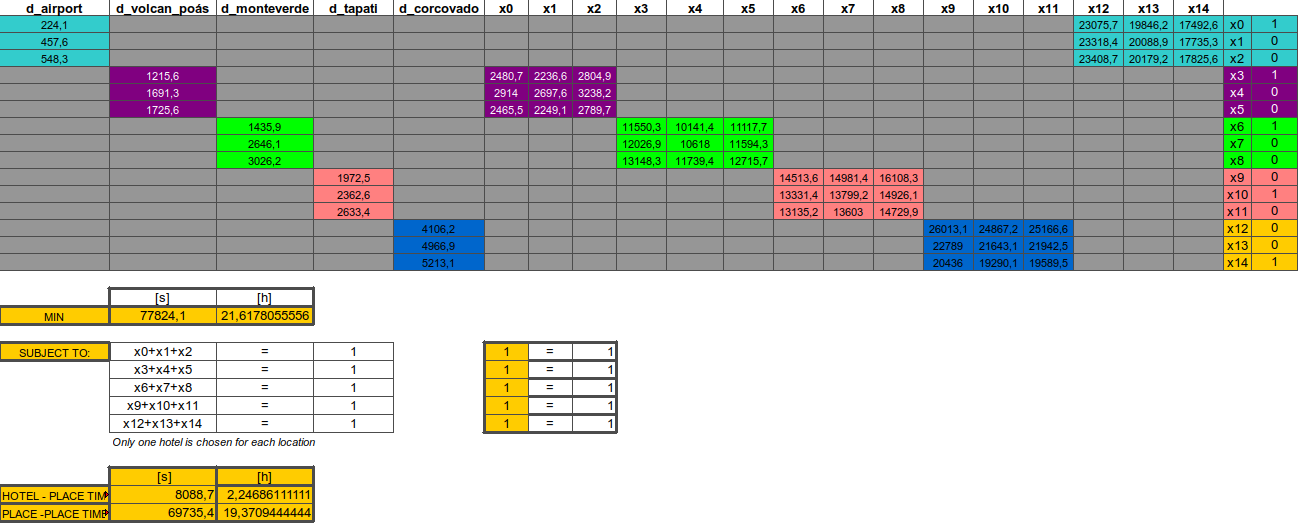

**xi** : Hotel in district i , 0 <= **x** <=1 

---

**MIN** z = SUM( duration between x [ i ] and place[ i ]) + SUM( duration between x [ day j ] and x [ day j+1 ])

---
Only one hotel is chosen for each location.

**Subject to** :

x0+x1+x2   = 1

x3+x4+x5   = 1

x6+x7+x8   = 1

x9+x10+x11 = 1

x12+x13+x14  =  1


# Best Route Algorithm 

Create all possible routes. First of all we need to do some preprocess.

In [30]:
def set_index_labels(df,num_labels):

  indexs = {}

  for i in range(num_labels):

   indexs[i] = '_x'+str(i)

  return df.rename(index=indexs)

In [34]:
def create_variables(num_vars):

  vars = []

  for i in range(num_vars):

    vars.append('x'+str(i))

  return vars

In [31]:
 _df = set_index_labels(df_simplified,15)

 _df

,Province,Canton,District,PostalCode,latitude,longitude,coordinates,d_airport,d_volcan_poás,d_monteverde,d_tapati,d_corcovado,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
_x0,Alajuela,Alajuela,Río Segundo,20109,10.0003,-84.1951,"-84.1951,10.0003",224.1,3257.6,10113.1,6142.0,22396.1,0.0,459.2,623.8,2497.8,2865.9,2384.7,9515.9,9983.7,11110.6,5468.0,4249.1,4038.7,23075.7,19846.2,17492.6
_x1,Alajuela,Alajuela,Alajuela,20101,10.0241,-84.2061,"-84.2061,10.0241",457.6,3013.5,10325.6,6383.3,22595.1,414.4,0.0,755.5,2238.3,2660.2,2179.0,9769.1,10236.9,11363.8,5599.7,4380.8,4170.4,23318.4,20088.9,17735.3
_x2,Heredia,Flores,Llorente,40803,9.9983,-84.1612,"-84.1612,9.9983",548.3,3581.8,10437.3,5858.2,22720.3,411.1,792.2,0.0,2830.8,3198.9,2717.7,9848.9,10316.7,11443.6,5064.6,3845.7,3635.3,23408.7,20179.2,17825.6
_x3,Alajuela,Poás,Sabana Redonda,20805,10.1427,-84.2144,"-84.2144,10.1427",2496.2,1215.6,12116.0,8421.9,24641.1,2480.7,2236.6,2804.9,0.0,2078.3,1237.5,11497.2,11965.0,13091.9,7649.1,6430.2,6219.8,25348.2,22118.7,19765.1
_x4,Alajuela,Grecia,San Isidro,20302,10.1245,-84.2683,"-84.2683,10.1245",2864.3,1691.3,10707.1,8790.0,24104.5,2914.0,2697.6,3238.2,2080.8,0.0,1974.5,10089.2,10557.0,11683.9,8082.4,6863.5,6653.1,24734.4,21504.9,19151.3
_x5,Alajuela,Poás,San Juan,20802,10.1333,-84.2357,"-84.2357,10.1333",2383.1,1725.6,11683.4,8308.8,24270.0,2465.5,2249.1,2789.7,1233.7,1979.4,0.0,11064.1,11531.9,12658.8,7633.9,6415.0,6204.6,25069.8,21840.3,19486.7
_x6,Puntarenas,Puntarenas,Monte Verde,60109,10.2914,-84.8248,"-84.8248,10.2914",9538.4,11800.8,1435.9,15321.3,26108.8,9547.4,9759.9,9871.6,11550.3,10141.4,11117.7,0.0,2713.9,3147.4,14649.5,13430.6,13220.2,26974.1,23744.6,21391.0
_x7,Guanacaste,Abangares,Sierra,50702,10.3222,-84.8996,"-84.8996,10.3222",10006.2,12268.6,2646.1,15789.1,26576.6,10024.0,10236.5,10348.2,12026.9,10618.0,11594.3,2719.7,0.0,1447.9,15126.1,13907.2,13696.8,27450.7,24221.2,21867.6
_x8,Guanacaste,Tilarán,Quebrada Grande,50802,10.3887,-84.8865,"-84.8865,10.3887",11133.1,13395.5,3026.2,16916.0,27703.5,11145.4,11357.9,11469.6,13148.3,11739.4,12715.7,3141.3,1448.2,0.0,16247.5,15028.6,14818.2,28572.1,25342.6,22989.0
_x9,Cartago,Cartago,Aguacaliente,30105,9.7475,-83.8778,"-83.8778,9.7475",5392.5,8426.0,15215.2,1972.5,25206.4,5334.3,5575.6,5050.5,7614.2,7982.3,7501.1,14513.6,14981.4,16108.3,0.0,1554.9,1825.7,26034.6,22805.1,20451.5


In [39]:
_df['x0']['_x1']

414.4

In [41]:
hotels = create_variables(15)

hotels

['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14']

In [73]:

import itertools

def best_route_v0(hotels,places, df):

  comb = ()

  min = 10000000000

  for x in itertools.combinations(hotels, len(places) ):

    #We could adapt de code only modifying the conditional

    if ((x[0] == 'x0') or (x[0] == 'x1') or (x[0] == 'x2')) and ((x[1] == 'x3') or (x[1] == 'x4') or (x[1] == 'x5')) and ((x[2] == 'x6') or (x[2] == 'x7') or (x[2] == 'x8')) and ((x[3] == 'x9') or (x[3] == 'x10') or (x[3] == 'x11')) and ((x[4] == 'x12') or (x[4] == 'x13') or (x[4] == 'x14')) :

      #calculate the duration beetween hotels and locations

      duration_h_p = 0

      for i in range(len(places)):

        duration_h_p = duration_h_p + df[places[i]]['_'+x[i]]

      #calculate the duration beetween hotels

      duration_hotels = 0

      for i in range(len(x)-1):

        if i != 0:

          duration_hotels = duration_hotels + df[x[i]]['_'+x[i+1]]

        else:

          pass

      duration_hotels = duration_hotels + df[x[-1]]['_'+x[0]]
         

      if (duration_hotels+duration_h_p) < min :

        min = (duration_hotels+duration_h_p)

        comb = x

    else:

      pass


  return comb,min
    

      

In [80]:
hotels = create_variables(15)

places = ['d_airport','d_volcan_poás','d_monteverde','d_tapati','d_corcovado']

result = best_route_v0(hotels,places,_df)

<h2> All the combinations were tried and the best route was found!</h2>

In [84]:
result

(('x0', 'x4', 'x6', 'x10', 'x14'), 71182.5)

In [71]:
_df['x4']['_x6']+_df['x6']['_x10']+_df['x10']['_x14']+_df['x14']['_x0']+_df[places[0]]['_x0']+_df[places[1]]['_x4']+_df[places[2]]['_x6']+_df[places[3]]['_x10']+_df[places[4]]['_x14']

71182.5

<h2>According to these calculations it will take 19.77 hours by car.</h2>

In [89]:
dr = _df.iloc[[0,4,6,10,14]]

dr

,Province,Canton,District,PostalCode,latitude,longitude,coordinates,d_airport,d_volcan_poás,d_monteverde,d_tapati,d_corcovado,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14
_x0,Alajuela,Alajuela,Río Segundo,20109,10.0003,-84.1951,"-84.1951,10.0003",224.1,3257.6,10113.1,6142.0,22396.1,0.0,459.2,623.8,2497.8,2865.9,2384.7,9515.9,9983.7,11110.6,5468.0,4249.1,4038.7,23075.7,19846.2,17492.6
_x4,Alajuela,Grecia,San Isidro,20302,10.1245,-84.2683,"-84.2683,10.1245",2864.3,1691.3,10707.1,8790.0,24104.5,2914.0,2697.6,3238.2,2080.8,0.0,1974.5,10089.2,10557.0,11683.9,8082.4,6863.5,6653.1,24734.4,21504.9,19151.3
_x6,Puntarenas,Puntarenas,Monte Verde,60109,10.2914,-84.8248,"-84.8248,10.2914",9538.4,11800.8,1435.9,15321.3,26108.8,9547.4,9759.9,9871.6,11550.3,10141.4,11117.7,0.0,2713.9,3147.4,14649.5,13430.6,13220.2,26974.1,23744.6,21391.0
_x10,Cartago,Cartago,Dulce Nombre,30109,9.8116,-83.8864,"-83.8864,9.8116",4173.6,7207.1,13996.3,2362.6,24060.5,4152.1,4393.4,3868.3,6432.0,6800.1,6318.9,13331.4,13799.2,14926.1,1553.5,0.0,1068.6,24893.4,21663.9,19310.3
_x14,Puntarenas,Osa,Piedras Blancas,60505,8.8142,-83.2633,"-83.2633,8.8142",17515.1,20542.0,21956.7,21259.2,5213.1,17625.7,17824.7,17949.9,19870.7,19334.1,19499.6,21338.4,21806.2,22933.1,20436.0,19290.1,19589.5,6021.1,5434.6,0.0


<h1>Roadtrip</h1>

In [90]:
lnga,lata = -84.2041127746699,9.997933974047806
lngv,latv = -84.24278716302729,10.196943409958461
lngm,latm  = -84.79402582701236,10.31792333245692
lngt,latt  = -83.77709939226695,9.761592197168095
lngc,latc = -83.55879213348997,8.566233468363677

map_res = folium.Map(location=[lata, lnga], zoom_start=10)
    
folium.CircleMarker(
        location = [lata, lnga],
        radius=15,
        popup= 'Airport',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_res)

folium.CircleMarker(
        location = [latv, lngv],
        radius=15,
        popup= 'Volcan',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_res)

folium.CircleMarker(
        location = [latm, lngm],
        radius=15,
        popup= 'Monteverde',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_res)

folium.CircleMarker(
        location = [latt, lngt],
        radius=15,
        popup= 'Tapati',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_res)  

folium.CircleMarker(
        location = [latc, lngc],
        radius=15,
        popup= 'Corcovado',
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.7).add_to(map_res)        

for index,row in dr.iterrows():

      lat = row['latitude']
      lng = row['longitude']
      label = row['District']
      folium.CircleMarker(
        location = [lat, lng],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_res)       


map_res